# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
#OpenWeatherMap API Key
api_key = "b2587e50f100d12291cbd2a921c7ff96"

#Starting URL for Weather Map API Call
url = "https://samples.openweathermap.org/data/2.5/weather?appid=" + api_key

resp = requests.get(url)
resp.json()

{'error': '404'}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#city_name = []
#cloudiness = []
#country = []
#date = []
# humidity = []
# lat = []
# lng = []
# max_temp = []
# wind_speed = []

# record = 1

# print(f'Beginning Data Retrieval')
# print(f'--------------------------------')

# for city in cities:
    
#     try:
#         response = requests.get(f"{url}&q={city}").json()
#         city_name.append(response["name"])
#         cloudiness.append(response["clouds"]["all"])
#         country.append(response["sys"]["country"])
#         date.append(response["dt"])
#         humidity.append(response)["main"]["humidity"]
#         max_temp.append(response["main"]["temp_max"])
#         lat.append(response["coord"]["lat"])
#         lng.append(response["coord"]["lon"])
#         wind_speed.append(response["wind"]["speed"])
#         city_record = response["name"]
#         print(f"Processing Record {record}) | {city_record}")
#         print(f"{url}&q={city}")
        
#         record= record + 1
        
#         time.sleep(1.01)
        
#         except:
#             print("City not found. Skipping...")
#             continue

In [26]:
print(cities[0:500])

['bratsk', 'nioro', 'atuona', 'anadyr', 'angoche', 'pathein', 'amderma', 'isangel', 'torbay', 'mataura', 'katsuura', 'cockburn town', 'kaitangata', 'krasnoarmeysk', 'new norfolk', 'sale', 'yulara', 'champerico', 'ushuaia', 'busselton', 'harper', 'saskylakh', 'elko', 'tenabo', 'taolanaro', 'east london', 'ormara', 'castro', 'grindavik', 'rikitea', 'jamestown', 'pevek', 'saint-philippe', 'fairbanks', 'hobart', 'port elizabeth', 'kapaa', 'neepawa', 'navsari', 'punta arenas', 'pitkyaranta', 'hermanus', 'mar del plata', 'oranjemund', 'arraial do cabo', 'bengkulu', 'chicama', 'mys shmidta', 'levokumskoye', 'todos santos', 'souillac', 'bambous virieux', 'dingle', 'mahebourg', 'knysna', 'bluff', 'tateyama', 'qingquan', 'ribeira grande', 'talnakh', 'torres', 'linfen', 'attawapiskat', 'monywa', 'bredasdorp', 'lorengau', 'nizhneyansk', 'barrow', 'ostrovnoy', 'krasnyy kommunar', 'aklavik', 'puerto baquerizo moreno', 'taoudenni', 'demidov', 'evensk', 'vanimo', 'bethel', 'port blair', 'high level', 

In [27]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'--------------------------------')

for city in cities:
    try:
        print("url is " + str(url))
        response = requests.get(f"{url}&q={city}")
        print(response.url)
        city_json = response.json()
        city_name.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        wind_speed.append(city_json['wind']['speed'])
        city_record = city_json["name"]
    
        print(f"Processing Record {city})")
        print(f"{url}&q={city}")

        record= record + 1
        time.sleep(1.01)


    except:

        print("City not found. Skipping...")

    continue  

Beginning Data Retrieval
--------------------------------
url is https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96
https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96&q=bratsk
Processing Record bratsk)
https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96&q=bratsk
url is https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96
https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96&q=nioro
Processing Record nioro)
https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96&q=nioro
url is https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96
https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12291cbd2a921c7ff96&q=atuona
Processing Record atuona)
https://samples.openweathermap.org/data/2.5/weather?appid=b2587e50f100d12

In [30]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          625
Cloudiness    625
Country       625
Date          625
Humidity      625
Lat           625
Lng           625
Max Temp      625
Wind Speed    625
dtype: int64

In [34]:
weather_data.to_csv('weather_data.csv')

weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
1,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
2,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
3,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
4,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
5,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
6,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
7,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
8,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1
9,London,90,GB,1485789600,81,51.51,-0.13,281.15,4.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

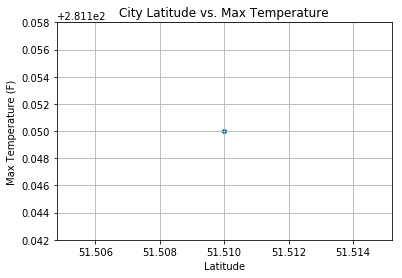

In [35]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_vs_CityLatitude.png")
plt.show()

#### Latitude vs. Humidity Plot

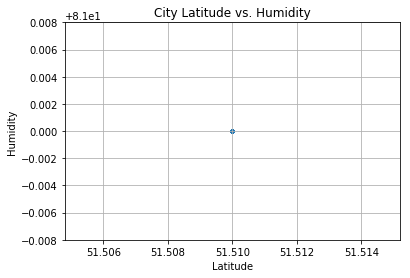

In [36]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_CityLatitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

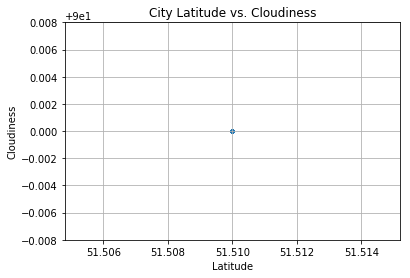

In [38]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_CityLatitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

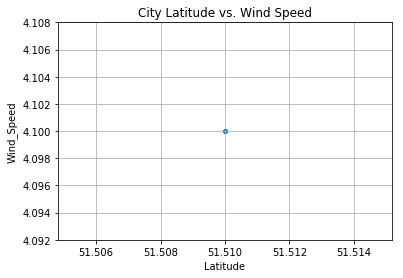

In [39]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_CityLatitude.png")
plt.show()